In [1]:
!pip install qiskit qiskit_aer
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=8d92a7fe3aa2ceeaafc18d68c2e2b511879be443d552959866a0d807fd995ed1
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [2]:
%matplotlib inline

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def qft_rotations(qc, n):
    """Apply QFT rotations recursively on the first n qubits."""
    if n == 0:
        return qc
    n -= 1
    qc.h(n)
    for qubit in range(n):
        qc.cp(np.pi / 2**(n - qubit), qubit, n)
    qft_rotations(qc, n)
    return qc

In [5]:
def swap_registers(qc, n):
    """Swap qubits to reverse their order."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    return qc

In [6]:
def qft_circuit(n):
    """Builds an n-qubit Quantum Fourier Transform circuit."""
    qc = QuantumCircuit(n)
    qft_rotations(qc, n)
    swap_registers(qc, n)
    qc.name = "QFT"
    return qc

In [20]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt

def execute_qft_and_visualize(num_qubits):
    """Run the QFT and display its Bloch sphere state."""
    circuit = qft_circuit(num_qubits)
    backend = AerSimulator(method='statevector')
    circuit.save_statevector()

    optimized = transpile(circuit, backend)
    outcome = backend.run(optimized).result()
    state_vector = outcome.data(0)["statevector"]

    bloch_plot = plot_bloch_multivector(state_vector)
    bloch_plot.show()
    plt.tight_layout()
    print(circuit.draw(output='text'))

if __name__ == "__main__":
    qubits = 3
    print(f"\nExecuting Quantum Fourier Transform for {qubits} qubits...\n")
    execute_qft_and_visualize(qubits)



Executing Quantum Fourier Transform for 3 qubits...

        ┌───┐                                      ░ ┌─┐       statevector 
   q_0: ┤ H ├─■────────■───────────────────────────░─┤M├────────────░──────
        └───┘ │P(π/2)  │       ┌───┐               ░ └╥┘┌─┐         ░      
   q_1: ──────■────────┼───────┤ H ├─■─────────────░──╫─┤M├─────────░──────
                       │P(π/4) └───┘ │P(π/2) ┌───┐ ░  ║ └╥┘┌─┐      ░      
   q_2: ───────────────■─────────────■───────┤ H ├─░──╫──╫─┤M├──────░──────
                                             └───┘ ░  ║  ║ └╥┘      ░      
meas: 3/══════════════════════════════════════════════╩══╩══╩══════════════
                                                      0  1  2              


<Figure size 640x480 with 0 Axes>

Task 1: Vary the number of qubits

In [19]:
from qiskit import QuantumCircuit
import numpy as np

def apply_qft_layers(circuit, qubits):
    if qubits == 0:
        return
    qubits -= 1
    circuit.h(qubits)
    for control in range(qubits):
        phase = np.pi / (2 ** (qubits - control))
        circuit.cp(phase, control, qubits)
    apply_qft_layers(circuit, qubits)

def reverse_qubit_order(circuit, qubit_count):
    for idx in range(qubit_count // 2):
        circuit.swap(idx, qubit_count - idx - 1)

def generate_qft(qubit_count):
    qft_circ = QuantumCircuit(qubit_count)
    apply_qft_layers(qft_circ, qubit_count)
    reverse_qubit_order(qft_circ, qubit_count)
    qft_circ.name = "Quantum_FT"
    return qft_circ

for qubits in [2, 3, 4]:
    print(f"\n>>> Quantum Fourier Transform for {qubits} qubits <<<")
    print(generate_qft(qubits).draw(output='text'))



>>> Quantum Fourier Transform for 2 qubits <<<
                   ┌───┐   
q_0: ──────■───────┤ H ├─X─
     ┌───┐ │P(π/2) └───┘ │ 
q_1: ┤ H ├─■─────────────X─
     └───┘                 

>>> Quantum Fourier Transform for 3 qubits <<<
                                          ┌───┐   
q_0: ──────■──────────────────────■───────┤ H ├─X─
           │                ┌───┐ │P(π/2) └───┘ │ 
q_1: ──────┼────────■───────┤ H ├─■─────────────┼─
     ┌───┐ │P(π/4)  │P(π/2) └───┘               │ 
q_2: ┤ H ├─■────────■───────────────────────────X─
     └───┘                                        

>>> Quantum Fourier Transform for 4 qubits <<<
                                                                          ┌───┐»
q_0: ──────■───────────────────────────────■──────────────────────■───────┤ H ├»
           │                               │                ┌───┐ │P(π/2) └───┘»
q_1: ──────┼────────■──────────────────────┼────────■───────┤ H ├─■─────────X──»
           │        │              

Task 2:  Inverse QFT (IQFT)

In [18]:
from qiskit import QuantumCircuit
import numpy as np

def build_iqft(qubit_count):
    circuit = QuantumCircuit(qubit_count)
    for idx in range(qubit_count // 2):
        circuit.swap(idx, qubit_count - idx - 1)
    for target in reversed(range(qubit_count)):
        for control in reversed(range(target)):
            angle = -np.pi / (2 ** (target - control))
            circuit.cp(angle, control, target)
        circuit.h(target)
    circuit.name = "IQFT"
    return circuit

iqft_circuit = build_iqft(3)
print(iqft_circuit.draw(output='text'))


                                      ┌───┐
q_0: ─X────────────■─────────■────────┤ H ├
      │            │         │P(-π/2) ├───┤
q_1: ─┼──■─────────┼─────────■────────┤ H ├
      │  │P(-π/2)  │P(-π/4)   ┌───┐   └───┘
q_2: ─X──■─────────■──────────┤ H ├────────
                              └───┘        


Task 3: Quantum Phase Estimation (QPE)

In [17]:
from qiskit import QuantumCircuit
import numpy as np

def build_inverse_qft(qubits):
    circuit = QuantumCircuit(qubits)
    for idx in range(qubits // 2):
        circuit.swap(idx, qubits - idx - 1)
    for target in reversed(range(qubits)):
        for control in reversed(range(target)):
            phase_angle = -np.pi / (2 ** (target - control))
            circuit.cp(phase_angle, control, target)
        circuit.h(target)
    return circuit

def construct_phase_estimation(unitary_op, ancilla_count):
    total_qubits = ancilla_count + unitary_op.num_qubits
    phase_circ = QuantumCircuit(total_qubits)
    phase_circ.h(range(ancilla_count))
    for anc in range(ancilla_count):
        controlled_gate = unitary_op.power(2 ** anc).to_gate().control(1)
        phase_circ.append(controlled_gate, [anc] + list(range(ancilla_count, total_qubits)))
    iqft_gate = build_inverse_qft(ancilla_count).to_gate()
    phase_circ.append(iqft_gate, range(ancilla_count))
    phase_circ.measure_all()
    return phase_circ

phase_value = 1 / 4
U_gate = QuantumCircuit(1)
U_gate.p(2 * np.pi * phase_value, 0)

qpe_circuit = construct_phase_estimation(U_gate, 3)
print(qpe_circuit.draw(output='text'))


        ┌───┐                                                      »
   q_0: ┤ H ├────────■─────────────────────────────────────────────»
        ├───┤        │                                             »
   q_1: ┤ H ├────────┼─────────────────■───────────────────────────»
        ├───┤        │                 │                           »
   q_2: ┤ H ├────────┼─────────────────┼─────────────────■─────────»
        └───┘┌───────┴────────┐┌───────┴────────┐┌───────┴────────┐»
   q_3: ─────┤ circuit-123**1 ├┤ circuit-123**2 ├┤ circuit-123**4 ├»
             └────────────────┘└────────────────┘└────────────────┘»
meas: 4/═══════════════════════════════════════════════════════════»
                                                                   »
«        ┌──────────────┐ ░ ┌─┐         
«   q_0: ┤0             ├─░─┤M├─────────
«        │              │ ░ └╥┘┌─┐      
«   q_1: ┤1 circuit-152 ├─░──╫─┤M├──────
«        │              │ ░  ║ └╥┘┌─┐   
«   q_2: ┤2             ├─░──╫──╫─┤M

Task 4: Measure Output States

In [16]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

def build_qft_circuit(num_qubits):
    circuit = QuantumCircuit(num_qubits)
    for q in range(num_qubits):
        circuit.h(q)
        for k in range(q + 1, num_qubits):
            phase_angle = np.pi / (2 ** (k - q))
            circuit.cp(phase_angle, k, q)
    circuit.measure_all()
    return circuit

def execute_qft(num_qubits):
    backend = AerSimulator()
    qft = build_qft_circuit(num_qubits)
    optimized_circuit = transpile(qft, backend)
    job_result = backend.run(optimized_circuit, shots=1024).result()
    outcomes = job_result.get_counts()
    histogram = plot_histogram(outcomes)
    plt.tight_layout()
    plt.show()
    print("QFT Measurement Results:", outcomes)

execute_qft(3)


<Figure size 640x480 with 0 Axes>

QFT Measurement Results: {'100': 127, '110': 134, '101': 125, '001': 138, '000': 129, '010': 116, '111': 120, '011': 135}


Task 5: Circuit Visualization

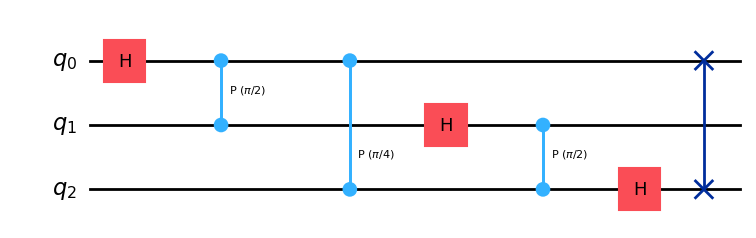

In [15]:
from qiskit import QuantumCircuit
import numpy as np
import matplotlib.pyplot as plt

def build_qft(num_qubits):
    circuit = QuantumCircuit(num_qubits)
    for target in range(num_qubits):
        circuit.h(target)
        for control in range(target + 1, num_qubits):
            angle = np.pi / (2 ** (control - target))
            circuit.cp(angle, control, target)
    for swap_index in range(num_qubits // 2):
        circuit.swap(swap_index, num_qubits - swap_index - 1)
    circuit.name = "QuantumFT"
    return circuit

qft_viz = build_qft(3)
qft_viz.draw(output='mpl')
